# AICE Associate 예상 문제 10회: 제품 불량 여부 예측

**과제: 공정 데이터 기반 제품 불량 여부 예측 AI 모델 개발**

**도메인: 제조/품질관리**

**배경:**
제조업에서 제품의 불량률을 관리하는 것은 품질 유지와 비용 절감의 핵심입니다. 'AICE 정밀'의 품질관리(QA)팀은 생산 라인에서 수집되는 다양한 공정 데이터를 분석하여, 어떤 조건에서 제품 불량이 발생하는지 패턴을 파악하고자 합니다. 이를 바탕으로 제품의 불량 가능성을 사전에 예측하는 AI 모델을 개발하여, 불량률을 최소화하고 선제적인 품질 관리를 수행하는 것이 목표입니다.

**데이터셋 설명 (파일명: `10_product_defect_status.csv`)**

* `production_line`: 생산 라인 (Line-1, Line-2, Line-3)
* `shift`: 교대조 (Day/Night)
* `operator_experience_years`: 작업자 경력 (년)
* `processing_time_min`: 공정 시간 (분)
* `temperature`: 공정 온도
* `humidity`: 공정 습도
* `measurement_A`: 측정값 A
* `measurement_B`: 측정값 B
* `measurement_C`: 측정값 C
* **`defect_status`**: **예측 목표(Target)**, 제품의 불량 여부 (1: 불량, 0: 정상)

--- 
#### **사전 실행 코드**
> 모든 문제를 풀기 전에 아래 코드를 실행해주세요.

In [168]:
# 데이터 분석 및 시각화에 필요한 기본 라이브러리들을 불러옵니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn 라이브러리에서 필요한 모듈들을 불러옵니다.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report

# TensorFlow Keras 라이브러리를 불러옵니다.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

--- 
#### **문제 1.**

Scikit-learn 라이브러리의 `ensemble` 모듈에는 여러 개의 약한 학습기를 결합하여 성능을 높이는 앙상블 모델들이 포함되어 있습니다. `sklearn.ensemble` 모듈에서 `GradientBoostingClassifier` 클래스를 임포트하는 코드를 작성하세요.

In [169]:
# 여기에 답안코드를 작성하세요.

#### **[해설 및 핵심 이론] 문제 1**


* **상세 해설**
  
    `from 패키지.모듈 import 클래스` 구문을 사용하여 `sklearn.ensemble` 모듈에서 `GradientBoostingClassifier` 클래스를 불러옵니다. Gradient Boosting은 이전 모델이 잘못 예측한 데이터에 가중치를 부여하여 다음 모델이 더 잘 맞추도록 하는 부스팅(Boosting) 계열의 앙상블 모델입니다.

In [170]:
from sklearn.ensemble import GradientBoostingClassifier

--- 
#### **문제 2.**

AI 모델링을 위해 분석할 데이터를 준비하고 기본적인 정보를 파악하려고 합니다. 아래 가이드에 따라 코드를 작성하세요.

1.  Pandas의 `read_csv` 함수를 사용하여 `10_product_defect_status.csv` 파일을 읽어 데이터프레임 변수 `defect_df`에 할당하세요.
2.  `info()` 함수를 사용하여 `defect_df`의 요약 정보를 확인하여 결측치와 데이터 타입을 파악하세요.

In [171]:
# 여기에 답안코드를 작성하세요.

#### **[해설 및 핵심 이론] 문제 2**


* **상세 해설**
  
    `pandas`의 `read_csv()` 함수로 데이터를 불러온 후, `info()` 메소드를 사용하여 데이터프레임의 전체적인 구조, 각 컬럼의 데이터 타입, 결측치 현황 등을 파악합니다. 실행 결과를 통해 `operator_experience_years`와 `processing_time_min` 컬럼에 결측치가 있음을 알 수 있습니다.

In [172]:
# '10_product_defect_status.csv' 파일을 읽어 defect_df 변수에 저장합니다.
defect_df = pd.read_csv('data/10_product_defect_status.csv')

# 데이터프레임의 요약 정보 확인
defect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   production_line            3000 non-null   object 
 1   shift                      3000 non-null   object 
 2   operator_experience_years  2913 non-null   float64
 3   processing_time_min        2914 non-null   float64
 4   temperature                3000 non-null   float64
 5   humidity                   3000 non-null   float64
 6   measurement_A              3000 non-null   float64
 7   measurement_B              3000 non-null   float64
 8   measurement_C              3000 non-null   float64
 9   defect_status              3000 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 234.5+ KB


In [173]:
# 연습
defect_df['shift'].value_counts()

shift
야간    1585
주간    1415
Name: count, dtype: int64

In [174]:
# 연습
defect_df['shift'].agg(['size'])

size    3000
Name: shift, dtype: int64

--- 
#### **문제 3.**

`온도(temperature)`가 `불량여부(defect_status)`에 따라 어떻게 다른 분포를 보이는지 시각적으로 탐색하고자 합니다.  
`seaborn`의 `boxplot`을 사용하여 두 그룹의 `temperature` 분포를 비교하고, 이상치가 더 많이 존재하는 `defect_status`가 무엇인지 `답안03` 변수에 작성하세요.

* **x축**: `defect_status`
* **y축**: `temperature`
* **데이터**: `defect_df`

In [175]:
# 여기에 답안코드를 작성하세요.
답안03 = 0

#### **[해설 및 핵심 이론] 문제 3**


* **상세 해설**
  
    `seaborn`의 `boxplot`은 각 그룹(정상/불량)의 데이터 분포를 상자 모양으로 요약하여 보여줍니다. `x`축에 `defect_status`, `y`축에 `temperature`를 설정하면, 불량(1) 그룹의 온도 분포가 정상(0) 그룹과 어떻게 다른지(예: 중앙값이 더 높은지, 분포가 더 넓은지 등) 시각적으로 비교할 수 있습니다.

<Axes: xlabel='defect_status', ylabel='temperature'>

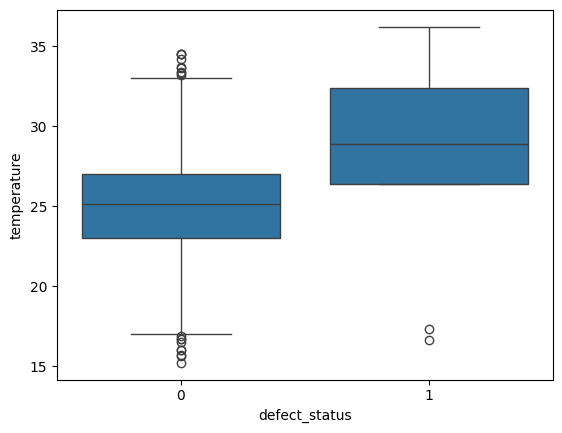

In [176]:
sns.boxplot(data=defect_df, x='defect_status', y='temperature')

--- 
#### **문제 4.**

`생산라인(production_line)`에 따른 불량 제품의 비율을 확인하려고 합니다. `pandas`의 `crosstab` 함수를 사용하여 두 변수의 교차표를 생성하고, `normalize='index'` 옵션을 사용하여 각 생산 라인 내에서 정상/불량 비율을 계산하세요.

In [177]:
# 여기에 답안코드를 작성하세요.
pd.crosstab(index=defect_df['production_line'], columns=defect_df['defect_status'], normalize='index')

defect_status,0,1
production_line,,
Line-1,1.000000,0.000000
Line-2,1.000000,0.000000
Line-3,0.990239,0.009761


#### **[해설 및 핵심 이론] 문제 4**

* **상세 해설**
  
    `pandas`의 `crosstab` 함수는 두 변수의 빈도를 표 형태로 만들어 줍니다. 여기에 `normalize='index'` 옵션을 추가하면, 각 행(index, 여기서는 생산 라인)의 합이 1이 되도록 비율로 변환해줍니다. 이를 통해 각 생산 라인별로 정상 제품과 불량 제품의 비율을 쉽게 비교할 수 있습니다.

In [178]:
# 생산라인과 불량여부의 교차표 생성 (비율 기준)
cross_table_ratio = pd.crosstab(defect_df['production_line'], defect_df['defect_status'], normalize='index')
cross_table_ratio

defect_status,0,1
production_line,,
Line-1,1.000000,0.000000
Line-2,1.000000,0.000000
Line-3,0.990239,0.009761


--- 
#### **문제 5.**

`교대조(shift)`별로 주요 측정값(`measurement_A`, `measurement_B`, `measurement_C`)의 평균을 비교하고자 합니다.  
`groupby()`를 사용하여 데이터를 `shift`로 그룹화하고, 세 가지 측정값의 평균을 계산하세요.

In [179]:
# 여기에 답안코드를 작성하세요.
defect_df.groupby('shift')[['measurement_A', 'measurement_B', 'measurement_C']].mean()
# defect_df.groupby('shift')[['measurement_A', 'measurement_B', 'measurement_C']].agg(['mean','sum']) 도 알아야 한다.
# single aggregation functions: mean, sum, size, count(NaN 제외), std, var, sem(standard error of mean), describe, first, last, min, max, nunique

,measurement_A,measurement_B,measurement_C
shift,,,
야간,99.864751,198.970915,49.917666
주간,100.167378,199.028558,50.044495


In [180]:
# 피봇테이블도 가능하다
# 여기서는 production_line 컬럼을 멀티인덱스로 추가해봤다.
temp_pivot = pd.pivot_table(defect_df, index='shift', values=['measurement_A', 'measurement_B', 'measurement_C'], columns='production_line')
temp_pivot

measurement_A                         measurement_B  \
production_line        Line-1      Line-2      Line-3        Line-1   
shift                                                                 
야간                  99.639321   99.666973  100.340491    198.415261   
주간                 100.433809  100.266682   99.736443    199.688311   

                                        measurement_C                        
production_line      Line-2      Line-3        Line-1     Line-2     Line-3  
shift                                                                        
야간               199.863927  198.669877     49.601882  50.129943  50.061738  
주간               198.914566  198.334642     50.286116  49.880045  49.917598

In [181]:
# melt 는 내가 원하는 데이터만 골라서 reshape 한다.
pd.melt(defect_df, id_vars=['shift','production_line'], value_vars='temperature')
# 그래서 id_vars 에는 보통 object 타입 컬럼명

,shift,production_line,variable,value
0,주간,Line-1,temperature,30.9
1,야간,Line-3,temperature,24.6
2,야간,Line-1,temperature,25.5
3,주간,Line-1,temperature,28.2
4,주간,Line-3,temperature,27.3
...,...,...,...,...
2995,주간,Line-3,temperature,23.9
2996,주간,Line-3,temperature,23.8
2997,야간,Line-3,temperature,24.1
2998,주간,Line-1,temperature,26.4


#### **[해설 및 핵심 이론] 문제 5**


* **상세 해설**
  
    `groupby('shift')`를 사용하여 데이터를 교대조별로 그룹화합니다. 그 후, 분석 대상 컬럼인 `['measurement_A', 'measurement_B', 'measurement_C']`를 선택하고 `.mean()`으로 각 그룹의 평균값을 계산합니다.

In [182]:
# 'shift'로 그룹화하여 주요 측정값들의 평균을 계산합니다.
shift_avg = defect_df.groupby('shift')[['measurement_A', 'measurement_B', 'measurement_C']].mean()
shift_avg

,measurement_A,measurement_B,measurement_C
shift,,,
야간,99.864751,198.970915,49.917666
주간,100.167378,199.028558,50.044495


--- 
#### **문제 6.**

모델링을 위해 데이터의 결측치를 처리하려고 합니다. 아래 가이드에 따라 결측치를 처리하고, 결과를 `defect_pre` 변수에 저장하세요.

1.  `defect_df` 데이터프레임을 복사하여 `defect_pre`를 생성합니다.
2.  `operator_experience_years` 컬럼의 결측치는 해당 컬럼의 **중앙값(median)** 으로 채우세요.
3.  `processing_time_min` 컬럼의 결측치는 해당 컬럼의 **평균값(mean)** 으로 채우세요.

In [183]:
# 여기에 답안코드를 작성하세요.

#### **[해설 및 핵심 이론] 문제 6**


* **상세 해설**
  
    `copy()`로 데이터프레임을 복사합니다. `operator_experience_years` 컬럼은 이상치의 영향을 덜 받는 중앙값(`.median()`)으로, `processing_time_min` 컬럼은 일반적인 대표값인 평균값(`.mean()`)으로 결측치를 채웁니다. 이처럼 컬럼의 특성에 따라 다른 통계량을 사용하여 결측치를 처리하는 전략을 사용할 수 있습니다.

In [184]:
# 원본 보존을 위해 데이터프레임을 복사합니다.
defect_pre = defect_df.copy()

# 1. 'operator_experience_years' 컬럼 결측치를 중앙값으로 채우기
median_exp = defect_pre['operator_experience_years'].median()
defect_pre['operator_experience_years'] = defect_pre['operator_experience_years'].fillna(median_exp)    # pandas recommend this syntax

# 2. 'processing_time_min' 컬럼 결측치를 평균값으로 채우기
mean_time = defect_pre['processing_time_min'].mean()
defect_pre['processing_time_min'] = defect_pre['processing_time_min'].fillna(mean_time)
        
# 전처리 결과 확인
defect_pre.isnull().sum()

production_line              0
shift                        0
operator_experience_years    0
processing_time_min          0
temperature                  0
humidity                     0
measurement_A                0
measurement_B                0
measurement_C                0
defect_status                0
dtype: int64

--- 
#### **문제 7.**

모델이 이해할 수 있도록 범주형 데이터를 수치형으로 변환하려고 합니다. 아래 가이드에 따라 두 가지 다른 방식으로 인코딩을 수행하세요.

1.  값이 두 개인 `shift` 컬럼은 `map()` 함수를 사용하여 '주간' -> 0, '야간' -> 1로 **직접 인코딩**하세요.
2.  값이 여러 개인 `production_line` 컬럼은 `pandas`의 `get_dummies()`를 사용하여 **원-핫 인코딩**을 수행하세요.
3.  모든 변환은 `defect_pre` 데이터프레임에 직접 적용하세요.

In [185]:
# 여기에 답안코드를 작성하세요.

#### **[해설 및 핵심 이론] 문제 7**


* **상세 해설**
  
    값이 두 개인 `shift` 컬럼은 `map()` 함수를 사용하여 0과 1로 간단하게 변환합니다. 값이 여러 개인 `production_line` 컬럼은 `get_dummies()`를 사용하여 각 카테고리를 별도의 컬럼으로 만들어주는 원-핫 인코딩을 수행합니다. 이처럼 컬럼의 특성에 따라 다른 인코딩 방식을 적용하는 것이 중요합니다.

In [186]:
# 1. 'shift' 컬럼 직접 인코딩
shift_map = {'주간': 0, '야간': 1}
defect_pre['shift'] = defect_pre['shift'].map(shift_map)

# 2. 'production_line' 원-핫 인코딩
defect_pre = pd.get_dummies(defect_pre, columns=['production_line'], dtype=int)

# 변환 결과 확인
defect_pre.head()

,shift,operator_experience_years,processing_time_min,temperature,humidity,measurement_A,measurement_B,measurement_C,defect_status,production_line_Line-1,production_line_Line-2,production_line_Line-3
0,0,11.0,28.2,30.9,49.0,102.31,172.37,46.22,0,1,0,0
1,1,2.0,25.0,24.6,57.3,94.46,162.90,52.36,0,0,0,1
2,1,7.0,18.4,25.5,46.4,91.87,187.95,45.75,0,1,0,0
3,0,14.0,30.3,28.2,32.0,107.93,204.50,52.99,0,1,0,0
4,0,5.0,23.6,27.3,61.7,111.14,183.81,46.28,0,0,0,1


--- 
#### **문제 8.**

기존 변수를 조합하여 새로운 특성, `측정값 비율(measurement_ratio)`을 생성하고, 훈련과 검증에 사용할 데이터셋을 분리하려고 합니다.

1.  `defect_pre` 데이터프레임에 `measurement_ratio`라는 새로운 컬럼을 추가하고, `measurement_A / measurement_B` 값을 계산하여 할당하세요. (`measurement_B`가 0인 경우는 없다고 가정합니다.)
2.  `defect_status` 컬럼을 label `y`로, 나머지 컬럼들을 feature `X`로 할당하세요.
3.  `train_test_split` 함수를 사용하여 훈련 데이터셋과 검증 데이터셋을 80:20 비율로 분리하세요. (`random_state=2024`, `stratify=y`)

In [187]:
# 여기에 답안코드를 작성하세요.

#### **[해설 및 핵심 이론] 문제 8**


* **상세 해설**
  
    기존 변수인 `measurement_A`와 `measurement_B`를 나누어 새로운 특성 `measurement_ratio`를 생성합니다. 그 후, `drop()`을 사용하여 `defect_status` 컬럼을 제외한 나머지를 `X`로, `defect_status` 컬럼을 `y`로 분리합니다. `train_test_split` 함수를 사용하는데, `stratify=y` 옵션을 추가하여 훈련 데이터와 검증 데이터의 불량품 비율(0과 1의 비율)이 원본 데이터와 동일하게 유지되도록 합니다.

In [188]:
# 1. 피처 엔지니어링
defect_pre['measurement_ratio'] = defect_pre['measurement_A'] / defect_pre['measurement_B']
    
# 2. Feature(X)와 Label(y) 분리
X = defect_pre.drop('defect_status', axis=1)
y = defect_pre['defect_status']

# 3. 훈련 데이터와 검증 데이터로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=2024, stratify=y)

# 분리 결과 확인
print(y_train.value_counts(normalize=True))
print(y_valid.value_counts(normalize=True))

defect_status
0    0.997083
1    0.002917
Name: proportion, dtype: float64
defect_status
0    0.996667
1    0.003333
Name: proportion, dtype: float64


--- 
#### **문제 9.**

수치형 데이터들의 단위를 맞춰주기 위해 데이터 스케일링을 진행합니다. 평균을 0, 표준편차를 1로 변환하는 `StandardScaler`를 사용하여 훈련 데이터와 검증 데이터의 Feature(`X_train`, `X_valid`)를 스케일링하는 코드를 작성하세요.

* 훈련 데이터에는 `fit_transform()`을, 검증 데이터에는 `transform()`을 적용하세요.
* 스케일링된 결과는 각각 `X_train_scaled`, `X_valid_scaled` 변수에 저장하세요.

In [189]:
# 여기에 답안코드를 작성하세요.

#### **[해설 및 핵심 이론] 문제 9**


* **상세 해설**
  
    `StandardScaler` 객체를 생성합니다. **훈련 데이터(`X_train`)에는 `fit_transform()`을 적용**하여 스케일링 규칙(평균, 표준편차)을 학습하고 변환하며, **검증 데이터(`X_valid`)에는 `transform()`만 적용**하여 데이터 누수를 방지합니다.

In [190]:
# StandardScaler 객체 생성
scaler = StandardScaler()

# 훈련 데이터에 fit_transform 적용
X_train_scaled = scaler.fit_transform(X_train)

# 검증 데이터에 transform 적용
X_valid_scaled = scaler.transform(X_valid)

--- 
#### **문제 10.**

단일 의사결정나무 모델인 `DecisionTreeClassifier`를 사용하여 불량 여부 예측 모델을 학습시키려고 합니다.  
아래 가이드에 따라 모델을 학습시키고, 검증 데이터셋(`X_valid_scaled`)에 대한 예측 결과를 `dt_pred` 변수에 저장하세요.

* `sklearn.tree`의 `DecisionTreeClassifier` 함수 사용
* **하이퍼파라미터 설정**:
    * `max_depth`: 5
    * `random_state`: 2024
* 모델 객체는 `model_dt` 변수에 저장하고, 스케일링된 훈련 데이터로 학습시키세요.

In [191]:
# 여기에 답안코드를 작성하세요.

#### **[해설 및 핵심 이론] 문제 10**


* **상세 해설**
  
    `DecisionTreeClassifier`는 데이터를 특정 기준에 따라 반복적으로 분할하여 예측을 수행하는 가장 기본적인 트리 모델입니다. `max_depth`는 트리가 과도하게 복잡해져 훈련 데이터에만 과적합되는 것을 방지하는 중요한 하이퍼파라미터입니다.

In [192]:
# DecisionTreeClassifier 모델 객체 생성
model_dt = DecisionTreeClassifier(max_depth=5, random_state=2024)

# 모델 학습
model_dt.fit(X_train_scaled, y_train)

# 검증 데이터에 대한 예측 수행
dt_pred = model_dt.predict(X_valid_scaled)

# accuracy score 출력
print(model_dt.score(X_train_scaled, y_train))

# Report 출력
print(classification_report(y_valid, dt_pred))

0.9991666666666666
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       598
           1       0.00      0.00      0.00         2

    accuracy                           0.99       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.99      0.99      0.99       600



--- 
#### **문제 11.**

이번에는 `GradientBoostingClassifier` 모델을 사용하여 학습을 진행하려고 합니다.  
아래 가이드에 따라 모델을 학습시키고, 검증 데이터셋(`X_valid_scaled`)에 대한 예측 결과를 `gb_pred` 변수에 저장하세요.

* `sklearn.ensemble`의 `GradientBoostingClassifier` 함수 사용 (1번 문제에서 임포트)
* **하이퍼파라미터 설정**:
    * `n_estimators`: 100
    * `learning_rate`: 0.1
    * `random_state`: 2024
* 모델 객체는 `model_gb` 변수에 저장하고 학습시키세요.

In [193]:
# 여기에 답안코드를 작성하세요.

#### **[해설 및 핵심 이론] 문제 11**


* **상세 해설**
  
    `GradientBoostingClassifier`는 이전 모델이 틀린 부분에 가중치를 주어 다음 모델이 그 부분을 집중적으로 학습하게 하는 부스팅 앙상블 기법입니다. 문제에서 제시된 하이퍼파라미터로 모델 객체 `model_gb`를 생성하고 학습시킨 후, `.predict()`를 사용하여 검증 데이터에 대한 예측값을 `gb_pred`에 저장합니다.

In [194]:
# GradientBoostingClassifier 모델 객체 생성
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=2024)

# 모델 학습
model_gb.fit(X_train_scaled, y_train)

# 검증 데이터에 대한 예측 수행
gb_pred = model_gb.predict(X_valid_scaled)

# accuracy score 출력
print(model_gb.score(X_train_scaled, y_train))

# Report 출력
print(classification_report(y_valid, gb_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       598
           1       0.00      0.00      0.00         2

    accuracy                           1.00       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.99      1.00      1.00       600



--- 
#### **문제 12.**

앞서 학습한 `DecisionTreeClassifier` 모델(`model_dt`), `GradientBoostingClassifier` 모델(`model_gb`)의 성능을 평가하려고 합니다.  
분류 모델의 성능을 평가하는 지표인 **정확도(Accuracy)** 와 **ROC AUC Score**를 계산하는 코드를 작성하세요.

* `sklearn.metrics`에서 `accuracy_score`, `roc_auc_score` 함수를 import하세요.
* **ROC AUC Score**를 계산하기 위해서는 예측 확률이 필요하므로, `predict_proba()` 메소드를 사용하세요.
* 두 가지 평가지표를 모두 계산하고 출력하세요.

In [195]:
# 여기에 답안코드를 작성하세요.

#### **[해설 및 핵심 이론] 문제 12**


* **상세 해설**
    * **정확도(Accuracy)**: 전체 예측 중 올바르게 예측한 비율로, 가장 직관적인 지표입니다.
    * **ROC AUC Score**: 모델이 양성(1)과 음성(0) 클래스를 얼마나 잘 구별하는지를 나타내는 지표입니다. 0.5는 무작위 예측, 1은 완벽한 예측을 의미하며, 1에 가까울수록 좋습니다. 이 지표를 계산하기 위해서는 `predict()` 대신 `predict_proba()` 메소드를 사용하여 각 클래스에 속할 '확률'을 예측해야 합니다. `[:, 1]`은 양성 클래스(불량)일 확률만 선택하라는 의미입니다.

* **핵심 이론**
    * **`model.predict_proba(X)`**: 각 데이터가 각 클래스에 속할 확률을 반환합니다. 이진 분류의 경우 `[[0번 클래스 확률, 1번 클래스 확률], ...]` 형태의 2차원 배열을 반환합니다.
    * **`roc_auc_score(y_true, y_pred_proba)`**: 실제값과 '양성 클래스일 확률'을 인자로 받아 ROC AUC 점수를 계산합니다.

In [196]:
# 의사결정나무 정확도 계산
dt_acc = accuracy_score(y_valid, dt_pred)
print(f"dt_Accuracy: {dt_acc:.4f}")

# 그래디언트 부스트 정확도 계산
gb_acc = accuracy_score(y_valid, gb_pred)
print(f"gb_Accuracy: {gb_acc:.4f}")

# 의사결정나무 ROC AUC Score 계산
# predict_proba로 불량(1)일 확률을 예측
print(f'dt 0번 클래스 확률은 {model_dt.predict_proba(X_valid_scaled)[0]}')  # 0번 클래스 확률은 False 0.9996, True 0.0004
dt_pred_proba = model_dt.predict_proba(X_valid_scaled)[:, 1]    # True 일 확률을 가져온다
dt_roc_auc = roc_auc_score(y_valid, dt_pred_proba)  # (y_true, y_score)
print(f"dt_ROC AUC Score: {dt_roc_auc:.4f}")

# 그래디언트 부스트 ROC AUC Score 계산
# predict_proba로 불량(1)일 확률을 예측
print(f'gb 0번 클래스 확률은 {model_dt.predict_proba(X_valid_scaled)[0]}')  # 0번 클래스 확률은 False 0.9996, True 0.0004
gb_pred_proba = model_gb.predict_proba(X_valid_scaled)[:, 1]
gb_roc_auc = roc_auc_score(y_valid, gb_pred_proba)
print(f"gb_ROC AUC Score: {gb_roc_auc:.4f}")

dt_Accuracy: 0.9950
gb_Accuracy: 0.9967
dt 0번 클래스 확률은 [9.99573015e-01 4.26985482e-04]
dt_ROC AUC Score: 0.5050
gb 0번 클래스 확률은 [9.99573015e-01 4.26985482e-04]
gb_ROC AUC Score: 0.9448


--- 
#### **문제 13.**

이번에는 딥러닝을 사용하여 불량 여부 예측 모델을 만들려고 합니다. 아래의 가이드에 따라 `tensorflow.keras`를 사용하여 이진 분류 모델을 구축하고 학습시키세요.

* `Sequential` 모델을 사용하세요.
* **모델 구조**:
    * **입력층**: `Dense` 레이어, 32개 노드, 활성화 함수 `relu`
    * **은닉층 1**: `Dense` 레이어, 16개 노드, 활성화 함수 `relu`
    * **Dropout**: 25%의 뉴런을 비활성화 (`Dropout(0.25)`)
    * **출력층**: `Dense` 레이어, **1개 노드**, 활성화 함수 **`sigmoid`**
* **컴파일 설정**:
    * `optimizer`: `adam`
    * `loss`: **`binary_crossentropy`**
    * `metrics`: `['accuracy']`
* **학습 설정**:
    * `epochs`: 25
    * `batch_size`: 32
    * `validation_data`로 `X_valid_scaled`, `y_valid`를 사용하여 검증 성능도 함께 확인하세요.
* 학습 과정은 `history` 변수에 저장하세요.

In [197]:
# 여기에 답안코드를 작성하세요.

#### **[해설 및 핵심 이론] 문제 13**


* **상세 해설**
  
    이진 분류를 위한 딥러닝 모델을 설계합니다.  
   `Dropout(0.25)`는 학습 시 25%의 뉴런을 무작위로 비활성화하여 과적합을 방지하는 역할을 합니다.  
   출력층은 `Dense(1, activation='sigmoid')`, 손실 함수는 `loss='binary_crossentropy'`를 사용하여 이진 분류 문제에 맞게 모델을 구성합니다.

In [198]:
# 딥러닝 모델 설계
model_dl = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),    # 또는 input_dim = 12 이렇게 써도 좋다.
    Dense(16, activation='relu'),
    Dropout(0.25),
    Dense(1, activation='sigmoid')
])

print(model_dl.summary())

# 모델 컴파일
model_dl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# callback 추가
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', patience=10)
mc = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# 모델 학습
history = model_dl.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_valid_scaled, y_valid),
    callbacks=[es, mc],
    verbose=1
)

print("딥러닝 모델 학습 완료")
model_dl.evaluate(X_valid_scaled, y_valid)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 32)             │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9921 - loss: 0.1406 - val_accuracy: 0.9967 - val_loss: 0.0306
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.9971 - loss: 0.0320 - val_accuracy: 0.9967 - val_loss: 0.0236
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.9971 - loss: 0.0255 - val_accuracy: 0.9967 - val_loss: 0.0218
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.9971 - loss: 0.0214 - val_accuracy: 0.9967 - val_loss: 0.0203
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.9971 - loss: 0.0199 - val_accuracy: 0.9967 - val_loss: 0.0186
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.9971 - loss: 0.0178 - val_accuracy: 0.9967 - val_loss: 0.0178
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.9971 - loss: 0.0173 - val_accuracy: 0.9967 - val_loss: 0.0169
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.9971 - loss: 0.0145

[0.01802687905728817, 0.996666669845581]

--- 
#### **문제 14.**

최종적으로 완성된 딥러닝 모델을 사용하여, 아래와 같은 새로운 공정 데이터가 들어왔을 때의 불량 확률을 예측하려고 합니다. 주어진 시뮬레이션 데이터(`new_product_data`)를 **9번 문제에서 생성한 스케일러(`scaler`)를 사용하여 변환**한 뒤, 딥러닝 모델로 불량 확률을 예측하는 코드를 작성하세요.

* 예측 결과(확률값)는 `predicted_defect_prob` 변수에 저장하세요.


In [199]:
# 아래 코드를 실행하여 시뮬레이션용 데이터를 생성하세요.
new_product_data = np.array([[1, 10.0, 25.0, 28.0, 55.0, 105.0, 195.0, 50.0, 0.538, 0, 1, 0]])

In [200]:
print(len(X_train_scaled[0]))
print(len(new_product_data[0]))
# 두 데이터의 첫행 길이가 같으므로 입력값으로 쓸 수 있다.
# 그런데 new data 에 범주형 데이터가 있다면, 원핫인코딩은?

12
12


#### **[해설 및 핵심 이론] 문제 14**


* **상세 해설**
  
    새로운 데이터 `new_product_data`를 **반드시 9번 문제에서 훈련 데이터로 학습시킨 `scaler` 객체를 사용하여 `transform()`** 해야 합니다. 스케일링된 데이터를 학습된 딥러닝 모델의 `.predict()` 메소드에 입력하면, `sigmoid` 함수를 통해 0과 1 사이의 '불량 확률'이 예측됩니다.

In [201]:
# 1. 9번 문제의 scaler를 사용하여 새로운 데이터를 스케일링합니다.
new_product_scaled = scaler.transform(new_product_data)

# 2. 딥러닝 모델로 불량 확률을 예측합니다.
predicted_defect_prob = model_dl.predict(new_product_scaled)
print(predicted_defect_prob)

print(f"새로운 제품의 예측 불량 여부: {predicted_defect_prob[0][0]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[1.9947105e-10]]
새로운 제품의 예측 불량 여부: 0.0000


### 출력층을 softmax 함수를 써서 새로운 모델을 만들어보자
#### to_categorical 사용

In [202]:
from tensorflow.keras.utils import to_categorical

# 2. Feature(X)와 Label(y) 분리
X = defect_pre.drop('defect_status', axis=1)
y = defect_pre['defect_status']

# 타겟 원핫 인코딩 (softmax 2개 출력용)
y = to_categorical(y, num_classes=2)
print(y[0:5])

# 3. 훈련 데이터와 검증 데이터로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=2024, stratify=y)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [203]:
from tensorflow.keras.layers import Input
'''
input_shape은 모델의 첫 번째 레이어에만 지정해주며, 이후의 레이어에서는
자동으로 입력 데이터의 형태를 추정합니다. 따라서, 모델의 첫 번째 레이어에서
input_shape을 지정할 때, 입력 데이터의 형태와 맞춰서 튜플을 입력해주어야 합니다.

입력 데이터의 형태에 따라 input_shape의 튜플은 달라질 수 있습니다.
    1차원 데이터: (특징 수,)
    2차원 시퀀스 데이터: (시퀀스 길이, 특징 수)
    3차원 이미지 데이터: (높이, 너비, 채널 수)
    4차원 이미지 데이터(배치 포함): (배치 크기, 높이, 너비, 채널 수)
'''

# 딥러닝 모델 설계
model_dl = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='elu'),
    Dense(16, activation='elu'),
    Dropout(0.25),
    Dense(2, activation='softmax')
])

print(model_dl.summary())

# 모델 컴파일
model_dl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# callback 추가
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', patience=10)
mc = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# 모델 학습
history = model_dl.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_valid_scaled, y_valid),
    callbacks=[es, mc],
    verbose=1
)

print("딥러닝 모델 학습 완료")
model_dl.evaluate(X_valid_scaled, y_valid)
train_result = model_dl.evaluate(X_valid, y_valid)
# The returned list contains the loss value and metrics values
print(f"Test loss: {train_result[0]}")
print(f"Test accuracy: {train_result[1]}")

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 32)             │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 978 (3.82 KB)

 Trainable params: 978 (3.82 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8446 - loss: 0.3917 - val_accuracy: 0.9967 - val_loss: 0.0889
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.9954 - loss: 0.0662 - val_accuracy: 0.9967 - val_loss: 0.0284
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.9971 - loss: 0.0314 - val_accuracy: 0.9967 - val_loss: 0.0231
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.9971 - loss: 0.0259 - val_accuracy: 0.9967 - val_loss: 0.0222
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.9971 - loss: 0.0237 - val_accuracy: 0.9967 - val_loss: 0.0226
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.9971 - loss: 0.0213 - val_accuracy: 0.9967 - val_loss: 0.0233
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.9971 - loss: 0.0200 - val_accuracy: 0.9967 - val_loss: 0.0239
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.9971 - loss: 0.0225

In [204]:
new_product_data = np.array([[1, 10.0, 25.0, 28.0, 55.0, 105.0, 195.0, 50.0, 0.538, 0, 1, 0]])

# 컬럼명을 추가해서 dataframe 으로 출력해보면
# 값을 보니 문제가 좀 이상함.  production_line_Line-1 은 인코딩된 컬럼인데 값이 0.538은 이상한 값이다.
new_product_data_df = pd.DataFrame(new_product_data, columns = X.columns)
print(new_product_data_df.head())

new_product_scaled = scaler.transform(new_product_data)

# 2. 딥러닝 모델로 불량 확률을 예측합니다.
predicted_defect_prob = model_dl.predict(new_product_scaled)
predicted_defect = np.argmax(predicted_defect_prob[0])
print(predicted_defect_prob)
print(predicted_defect)
print(f"새로운 제품의 예측 불량 여부: {predicted_defect}")

   shift  operator_experience_years  processing_time_min  temperature  \
0    1.0                       10.0                 25.0         28.0   

   humidity  measurement_A  measurement_B  measurement_C  \
0      55.0          105.0          195.0           50.0   

   production_line_Line-1  production_line_Line-2  production_line_Line-3  \
0                   0.538                     0.0                     1.0   

   measurement_ratio  
0                0.0  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[9.9998462e-01 1.5423628e-05]]
0
새로운 제품의 예측 불량 여부: 0
